In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Crear un subconjunto de datos

In [3]:
# Buscar cuantas filas tiene una determinada columna de un dataset
account_length = data["Account Length"]
account_length.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [4]:
len(account_length.index)

3333

In [5]:
# Cuando se extrea una columna, no genera un data set, sino un Series
type(account_length)

pandas.core.series.Series

In [6]:
# Para extraer multiples columnas se usa doble corchete
subset = data[["Account Length", "Phone", "Eve Charge", "Day Calls"]]
subset.head()

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [7]:
# Cuando son varias columnas si se extrae como DataFrame
type(subset)

pandas.core.frame.DataFrame

In [8]:
# Se puede pasar una lista con las columnas a extraer
desired_columns = ["Account Length", "Phone", "Eve Charge", "Night Calls"]
subset = data[desired_columns]
subset.head()

,Account Length,Phone,Eve Charge,Night Calls
0,128,382-4657,16.78,91
1,107,371-7191,16.62,103
2,137,358-1921,10.30,104
3,84,375-9999,5.26,89
4,75,330-6626,12.61,121


In [9]:
# El truco es generar la lista más pequeña y con un bucle extraer las que 
# queremos. ejemplo
# Esta no las quiero
desired_columns = ["Account Length", "Phone", "Eve Charge", "Night Calls"]
desired_columns

['Account Length', 'Phone', 'Eve Charge', 'Night Calls']

In [10]:
# Todas las columnas en una lista
all_columns_list = data.columns.values.tolist()
all_columns_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [11]:
# Con un bucle eliminamos
sublist = [x for x in all_columns_list if x not in desired_columns]
sublist

['State',
 'Area Code',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Night Mins',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [12]:
subset = data[sublist]
subset.head()

,State,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Night Mins,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,244.7,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,254.4,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,162.6,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,196.9,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,186.9,8.41,10.1,3,2.73,3,False.


In [13]:
a = set(desired_columns)

In [14]:
b = set(all_columns_list)

In [15]:
sublist2 = b-a

In [16]:
sublist2 = list(sublist2)

In [17]:
sublist2

['State',
 'CustServ Calls',
 'Day Charge',
 'Day Mins',
 'Intl Charge',
 'Intl Calls',
 'Day Calls',
 'Intl Mins',
 'Eve Mins',
 'Night Mins',
 "Int'l Plan",
 'Eve Calls',
 'Night Charge',
 'VMail Message',
 'Churn?',
 'VMail Plan',
 'Area Code']

In [18]:
# Subconjunto de filas 

# Se toma el primer elemento, pero el último no.
# muestra desde el 1 al 9
data[1:10]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [19]:
# Como toma el primer elemento se puede hacer así
data[:10]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [20]:
# Tambien se puede hacer, desde la fila 20 al final
data[20:]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
20,FL,147,415,396-5800,no,no,0,155.1,117,26.37,...,93,20.37,208.8,133,9.40,10.6,4,2.86,0,False.
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True.
22,AZ,130,415,358-1958,no,no,0,183.0,112,31.11,...,99,6.20,181.8,78,8.18,9.5,19,2.57,0,False.
23,SC,111,415,350-2565,no,no,0,110.4,103,18.77,...,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False.
24,VA,132,510,343-4696,no,no,0,81.1,86,13.79,...,72,20.84,237.0,115,10.67,10.3,2,2.78,0,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [21]:
# Filtramos con alguna condición

In [22]:
# Filas con minutos mayores a 300
data1 = data[data["Day Mins"] > 300]
data1

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.
197,TX,208,510,378-3625,no,no,0,326.5,67,55.51,...,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True.
230,MD,93,408,360-3324,yes,no,0,312.0,109,53.04,...,100,11.00,217.6,74,9.79,10.5,2,2.84,0,True.
289,OK,89,510,352-6976,no,no,0,303.9,95,51.66,...,114,22.18,312.1,89,14.04,5.3,3,1.43,1,True.
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True.
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,123,5.65,246.5,99,11.09,9.2,10,2.48,4,False.
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,89,17.03,183.5,105,8.26,14.2,2,3.83,1,False.
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True.


In [23]:
# Usuarios de Nueva York (State = "NY")
data2 = data[data["State"] == "NY"]
data2

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
182,NY,67,408,405-2888,no,yes,36,115.6,111,19.65,...,94,20.20,169.9,103,7.65,9.9,12,2.67,2,False.
186,NY,106,408,422-1471,no,no,0,158.7,74,26.98,...,139,5.47,198.5,103,8.93,10.2,4,2.75,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,NY,150,415,421-6268,no,yes,35,139.6,72,23.73,...,170,28.29,213.8,105,9.62,8.8,2,2.38,2,False.
3227,NY,209,415,369-8703,no,no,0,153.7,105,26.13,...,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False.
3257,NY,171,415,412-6245,no,no,0,137.5,110,23.38,...,109,16.84,292.7,131,13.17,13.3,5,3.59,2,False.
3275,NY,120,510,405-5083,no,yes,27,128.5,115,21.85,...,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False.


In [24]:
 # and -> &, or -> |

In [25]:
data3 = data[(data["Day Mins"] > 300) & (data["State"] == "NY")]
data3

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True.


In [26]:
data4 = data[(data["Day Mins"] > 300) | (data["State"] == "NY")]
data4

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,NY,209,415,369-8703,no,no,0,153.7,105,26.13,...,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False.
3257,NY,171,415,412-6245,no,no,0,137.5,110,23.38,...,109,16.84,292.7,131,13.17,13.3,5,3.59,2,False.
3275,NY,120,510,405-5083,no,yes,27,128.5,115,21.85,...,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False.
3310,NY,94,415,363-1123,no,no,0,190.4,91,32.37,...,107,7.82,224.8,108,10.12,13.6,17,3.67,2,False.


In [27]:
data5 = data[data["Day Calls"] < data["Night Calls"]]
data5.shape
# Esto da a entender que en 1626 ocaciones se llama más de noche que de día

(1626, 21)

In [28]:
# Minutos del día, de noche y longitud de cuenta de los primeros 50 individuos
subset_first_50 = data[["Day Mins", "Night Mins", "Account Length"]][:50]
subset_first_50.shape

(50, 3)

In [29]:
# loc e iloc
# iloc selecciona en base a su ubicación
# loc selecciona filas o colum en base a su etiqueta
data.iloc[1:10, [2,5,7]]

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
2,415,no,243.4
3,408,no,299.4
4,415,no,166.7
5,510,no,223.4
6,510,yes,218.2
7,415,no,157.0
8,408,no,184.5
9,415,yes,258.6


In [30]:
data.iloc[[1,5,8,36], [2,5,7]]

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
5,510,no,223.4
8,408,no,184.5
36,408,yes,146.3


In [31]:
data.loc[[1,5,8,36], ["Area Code", "VMail Plan", "Day Mins"]]

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
5,510,no,223.4
8,408,no,184.5
36,408,yes,146.3


In [32]:
# Creamos una columna nueva con la operaciones de 3 existentes
data["Total Mins"] = data["Day Mins"] + data["Night Mins"] + data["Eve Mins"]

In [33]:
data["Total Mins"].head()

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: Total Mins, dtype: float64

In [34]:
data["Total Calls"] = data["Day Calls"] + data["Night Calls"] + data["Eve Calls"]

In [35]:
data["Total Calls"].head()

0    300
1    329
2    328
3    248
4    356
Name: Total Calls, dtype: int64

### Generación de números aleatorios

In [36]:
import numpy as np

In [37]:
# Ej. generar número aleatorio entre 1 y 100
np.random.randint(1, 100)

43

In [38]:
# La forma clasica es generar una número aleatorio entre 0 y 1 (decimales)
np.random.random()

0.12645933814760713

In [39]:
# Función que genera n números aleatorios entre un rango a, b
def randint_list(n, a, b):
    ## generamos array vacio 
    x = []
    ## range genera una lista de 0 a n, es decir, 
    ## gracias al range el for recorre desde el 0 a n
    for i in range(n):
        x.append(np.random.randint(a, b))
    return x

In [40]:
randint_list(25, 0, 50)

[42,
 15,
 47,
 16,
 5,
 22,
 21,
 22,
 4,
 32,
 24,
 14,
 21,
 18,
 7,
 19,
 10,
 39,
 37,
 49,
 28,
 34,
 12,
 8,
 46]

In [41]:
# El método randrange hace lo mismo que la función anterior
import random
for i in range(10):
    # genera multiplos de 7 entre 0 a 100
    print(random.randrange(0, 100, 7))

42
21
70
7
56
14
70
56
0
70


##### Shuffing (reordena de forma aleatoria una lista)

In [42]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [43]:
np.random.shuffle(a)
a

array([ 7, 46, 89, 74, 85, 18,  8, 43, 75, 33, 15, 57, 28, 79, 45,  5, 17,
       73, 70,  2, 54, 32, 81, 96, 34,  9, 62, 42, 82, 77, 35, 95, 98, 92,
       53,  0, 61, 40, 27, 48, 76, 25, 90, 10, 11, 87, 29, 66, 13, 71, 91,
       83, 97, 50, 72, 63, 16, 88, 69, 55, 19, 30,  3, 58, 52, 60, 44,  6,
       41, 14, 20, 93, 51, 56, 21, 22, 37,  4, 80, 59, 47, 24, 31, 68, 39,
       78, 65, 99, 38, 12, 23, 64, 86,  1, 26, 84, 36, 49, 94, 67])

In [44]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,707.2,300
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,611.5,329
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,527.2,328
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,558.2,248
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,501.9,356


In [45]:
data.shape

(3333, 23)

In [46]:
column_list = data.columns.values.tolist()
column_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?',
 'Total Mins',
 'Total Calls']

##### Choice (Selección aleatoria un elemento de una lista)

In [47]:
np.random.choice(column_list)

'VMail Plan'

#### Seed

In [48]:
# Es importante declarar una semilla para que el ejercicio
# se pueda reproducir.
np.random.seed(2018)
for i in range(5):
    print(np.random.random())

0.8823493117539459
0.10432773786047767
0.9070093335163405
0.3063988986063515
0.446408872427422


### Funciones de distribución de probabilidades

###### Distribución Uniforme

In [49]:
# Se define en base a su punto de origen y su punto final, cada punt
# subyace en un extremo que indica que todos son igual de probable.
import numpy as np
import matplotlib.pyplot as plt
# raiz
np.random.seed(2022)

In [50]:
# a y b son el rango
# n es la cantidad a generar
a = 1
b = 100
n = 5000000
data = np.random.uniform(a, b, n)

(array([499957., 500493., 499343., 499410., 499460., 499673., 500828.,
        499838., 500287., 500711.]),
 array([ 1.00000241, 10.89999427, 20.79998613, 30.69997798, 40.59996984,
        50.4999617 , 60.39995356, 70.29994542, 80.19993728, 90.09992914,
        99.999921  ]),
 <BarContainer object of 10 artists>)

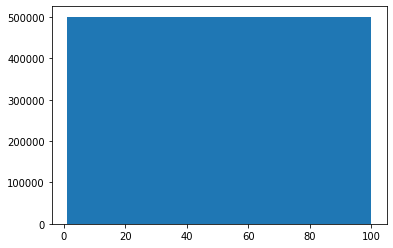

In [51]:
%matplotlib inline
plt.hist(data)

### Distribución Normal

In [62]:
data = np.random.randn(1000000)

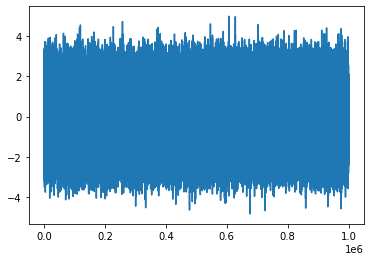

In [63]:
x = range(1, 1000001)
plt.plot(x, data)

(array([5.30000e+01, 2.06000e+03, 2.77370e+04, 1.53608e+05, 3.46534e+05,
        3.24039e+05, 1.25024e+05, 1.96390e+04, 1.26900e+03, 3.70000e+01]),
 array([-4.82441887, -3.84450793, -2.86459698, -1.88468603, -0.90477509,
         0.07513586,  1.05504681,  2.03495775,  3.0148687 ,  3.99477965,
         4.97469059]),
 <BarContainer object of 10 artists>)

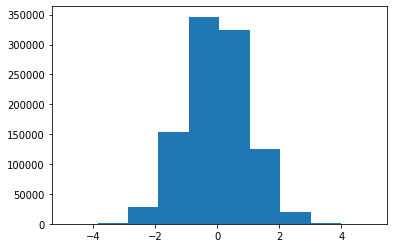

In [64]:
%matplotlib inline
plt.hist(data)

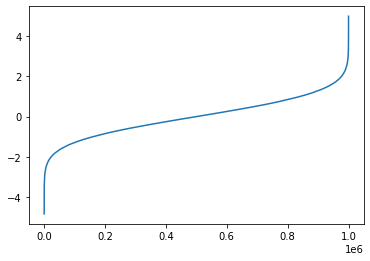

In [65]:
 plt.plot(x,sorted(data))